Load Julia packages (libraries) needed

In [1]:
using StatisticalRethinking
gr(size=(600,300));

### snippet 2.3

Define a grid

In [2]:
N = 20
p_grid = range( 0 , stop=1 , length=N )

0.0:0.05263157894736842:1.0

Define the (uniform) prior

In [3]:
prior = ones( 20 );

Compute likelihood at each value in grid

In [4]:
likelihood = [pdf(Binomial(9, p), 6) for p in p_grid]
likelihood[1:5]

5-element Array{Float64,1}:
 0.0                  
 1.5181489823498353e-6
 8.185092949558011e-5 
 0.0007772922789631156
 0.0035985753655699746

Compute product of likelihood and prior

In [5]:
unstd_posterior = likelihood .* prior;

Standardize the posterior, so it sums to 1

In [6]:
posterior = unstd_posterior  ./ sum(unstd_posterior);

### snippet 2.4

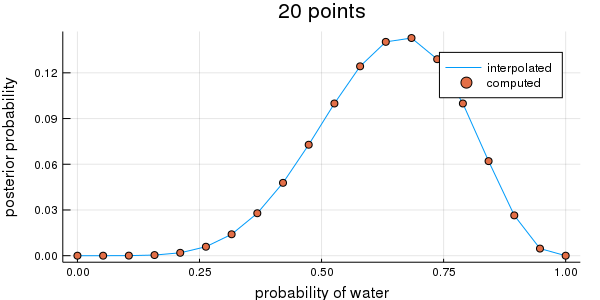

In [7]:
p1 = plot( p_grid , posterior ,
    xlab="probability of water" , ylab="posterior probability",
    lab = "interpolated", title="20 points" )
p2 = scatter!( p1, p_grid , posterior, lab="computed" )

### snippet 2.5

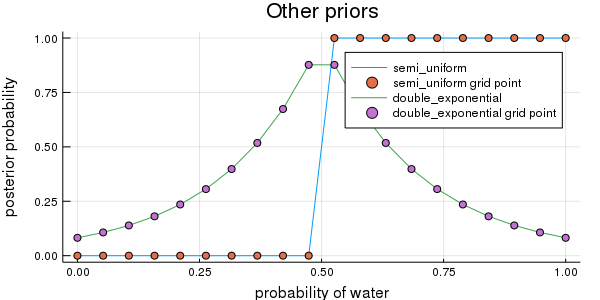

In [8]:
prior1 = [p < 0.5 ? 0 : 1 for p in p_grid]
prior2 = [exp( -5*abs( p - 0.5 ) ) for p in p_grid]

p3 = plot(p_grid, prior1,
  xlab="probability of water" , ylab="posterior probability",
  lab = "semi_uniform", title="Other priors" )
scatter!(p3, p_grid, prior1, lab = "semi_uniform grid point")
plot!(p3, p_grid, prior2,  lab = "double_exponential" )
scatter!(p3, p_grid, prior2,  lab = "double_exponential grid point" )

End of `02/clip-03-05.jl`

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*